# O Mnist
### É uma base de dados de digitos manuscritos, ele tem 60 mil imagens para treinamentos e 10 mil imagens para teste. A base de dados foi organizada pelo National Institute of Standards and Technology

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# importando a biblioteca tensorflow
# importando keras, que é API para tensoflow
# importando tipo de layers dense, totalmente conectada e flatten, que transforma a entrada multidimensional
# em uma dimensão unica no caso em 2D
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
''' função que faz o download das imagens de digitos manuscritos de tamanho de 28x28,
 distribuindo em treinos e testes'''
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
# dataframe do treino com 60 mil imagens de 28 x 28
X_train.shape

(60000, 28, 28)

In [5]:
# 10 mil imagens de teste de 28x28
X_test.shape

(10000, 28, 28)

In [6]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  96, 244, 251, 253,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 127, 251, 251, 253,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 236, 251, 211,  31,   8,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  60, 228, 251, 251,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 155, 253, 253, 189,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  20, 253, 251, 235,  66,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         32, 205, 253, 251, 126,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        104, 251, 253, 184,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  80,
        240, 251, 193,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 253,
        253, 253, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 251,
        251, 251,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 221, 251,
        251, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 234, 251, 251,
        196,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 251, 251,
         89,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 255, 253, 253,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  48, 228, 253, 247, 140,
          8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 251, 253, 220,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 251, 253, 220,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

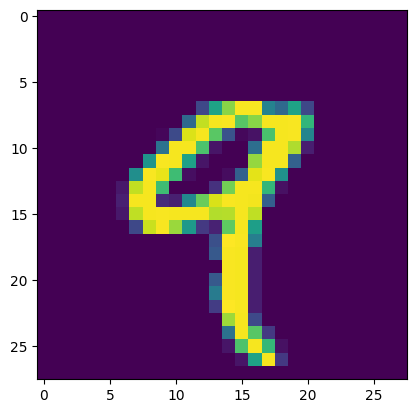

In [7]:
# mostrando o número graficamente
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

In [8]:
# normalização dos dados, diminuindo para 255
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# criando camadas
model = Sequential()
# converter a imagem para uma dimensão 2D de 28 linhas x 28 colunas
model.add(Flatten(input_shape=(28,28)))
# função de ativação a ReLU (Rectified Linear Unit), que torna um peso negativo em 0
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
# adiciona 1 camadas para cada um número para probabilidade de ser
model.add(Dense(10,activation='softmax'))

In [11]:
# resumo do rede neural
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# otimizador Adam, que utiliza estimativas adaptativas
# sparse categorical crossentropy, quando tem mais de uma classe para predizer, no caso são 10
# caso fosse binária classificação seria somente categorial crossentropy
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
# treinar o modelo passando os dataframes de treinamento e targets ()
# 25 epochs, faz todo o processo de dados
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 16s 9ms/step - loss: 0.2829 - accuracy: 0.9169 - val_loss: 0.1669 - val_accuracy: 0.9511
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1132 - accuracy: 0.9658 - val_loss: 0.1101 - val_accuracy: 0.9673
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.0963 - val_accuracy: 0.9714
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.1061 - val_accuracy: 0.9686
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0884 - val_accuracy: 0.9757
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0371 - accuracy: 0.9876 - val_loss: 0.1128 - val_accuracy: 0.9699
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.1031 - val_accuracy

In [14]:
# depois de treinado, predizer o dataset de teste
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
# ver os valores mais altos da probabilidade
y_pred = y_prob.argmax(axis=1)

In [16]:
# importar as funções de metricas do sklearn
# calcula a acurácia dos valores reais com o predito no dataset de teste
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.971

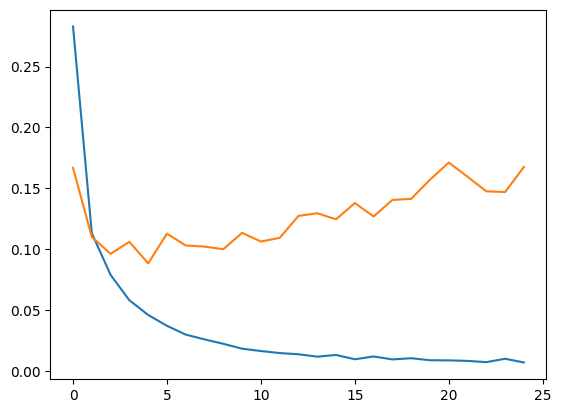

In [17]:
# mostra o gráfico de linha da loss função, ele desceu um pouco o gradiente,
# apesar de não chegar ao valor mais baixo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

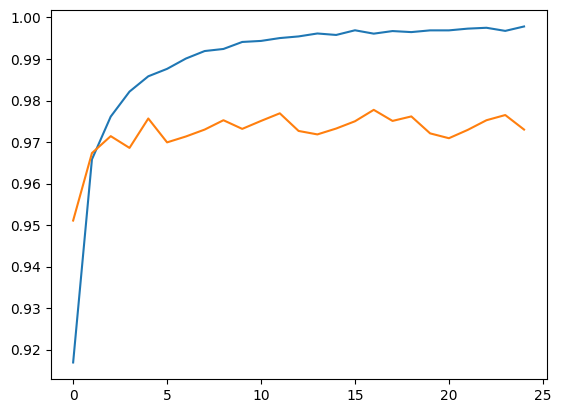

In [18]:
# gráfico da acurácia, subiu um pouco mas se manteve estável
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

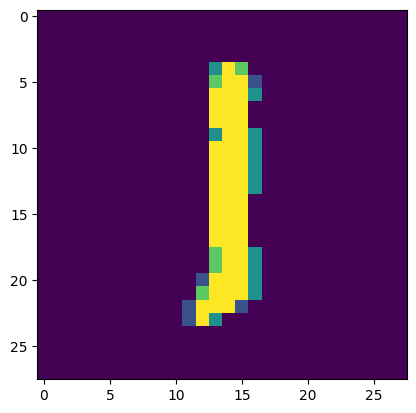

In [19]:
# mostrando uma linha do dataset de teste
plt.imshow(X_test[14])

In [20]:
# usando a rede neural para predizer
result = model.predict(X_test[14].reshape(1,28,28)).argmax(axis=1)
result

1/1 [==============================] - 0s 21ms/step


array([1])

In [21]:
result

array([1])